In [98]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [115]:
import sympy
from sympy import init_printing

In [116]:
rhoo = sympy.symbols('rhoo')

In [117]:
Vmax = 80
L = 11
rho_max = 250
nx = 51
dt = 0.001
dx = 0.22    #L/nx-1 = 11/50 = 0.22
x = numpy.linspace(0, L, nx)

In [118]:
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50


In [119]:
F = Vmax*rhoo*(1-(rhoo/rho_max))
F

80*rhoo*(-rhoo/250 + 1)

In [120]:
Fprime = F.diff(rhoo)
Fprime

-16*rhoo/25 + 80

In [121]:
from sympy.utilities.lambdify import lambdify

In [122]:
FFprime = lambdify((rhoo), Fprime)

In [123]:
Fpie = numpy.asarray([FFprime(xi) for xi in rho0])    #there is a problem: xi should be in rho list
Fpie

array([ 73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,
        73.6,  48. ,  48. ,  48. ,  48. ,  48. ,  48. ,  48. ,  48. ,
        48. ,  48. ,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,
        73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,
        73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,  73.6,
        73.6,  73.6,  73.6,  73.6,  73.6,  73.6])

In [124]:
rho = rho0

In [125]:
for i in range (50):
    rhon = rho.copy()
    rho[1:] = rho[1:] - (dt/dx)*Fpie[1:]*(rho[1:]-rho[:-1])
    rho[0] = 10
    Fpie = numpy.asarray([FFprime(xi) for xi in rho])
    

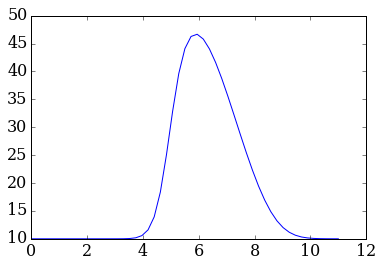

In [126]:
pyplot.plot(x, rho)

In [127]:
V = Vmax*(1-rho/rho_max)
numpy.mean(V)/3.6

20.56188759703987

In [132]:
Vmax = 80
L = 11
rho_max = 250
nx = 51
dt = 0.001
dx = 0.22    #L/nx-1 = 11/50 = 0.22
x = numpy.linspace(0, L, nx)

In [133]:
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
F = Vmax*rhoo*(1-(rhoo/rho_max))
Fprime = F.diff(rhoo)
FFprime = lambdify((rhoo), Fprime)
Fpie = numpy.asarray([FFprime(xi) for xi in rho0])
rho = rho0




In [134]:
for i in range (101):
    rhon = rho.copy()
    rho[1:] = rho[1:] - (dt/dx)*Fpie[1:]*(rho[1:]-rho[:-1])
    rho[0] = 10
    Fpie = numpy.asarray([FFprime(xi) for xi in rho])

In [135]:
V = Vmax*(1-(rho/rho_max))

min(V)/3.6

18.586633475277495

In [95]:
rho

array([ 10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        10.        ,  10.        ,  10.00000001,  10.0000003 ,
        10.0000043 ,  10.0000406 ,  10.00028145,  10.00152938,
        10.00678571,  10.02528873,  10.0808281 ,  10.22515956,
        10.55376185,  11.21542173,  12.4027856 ,  14.31374285,
        17.08634321,  20.72813137,  25.07210043,  29.78468239,
        34.42675567,  38.54138395,  41.73109433,  43.70091093,
        44.2702428 ,  43.375533  ,  41.08175088,  37.59911278,
        33.28189998,  28.58707607,  23.99244954,  19.90065438,
        16.56635195,  14.07258531,  12.35753514,  11.27164342,
        10.63819169,  10.29759261,  10.12876616,  10.05163022,
        10.01915625,  10.00656675,  10.00207625])

In [96]:
V

array([ 76.8       ,  76.8       ,  76.8       ,  76.8       ,
        76.8       ,  76.8       ,  76.8       ,  76.8       ,
        76.8       ,  76.8       ,  76.8       ,  76.7999999 ,
        76.79999862,  76.79998701,  76.79990994,  76.7995106 ,
        76.79782857,  76.79190761,  76.77413501,  76.72794894,
        76.62279621,  76.41106505,  76.03110861,  75.41960229,
        74.53237017,  73.36699796,  71.97692786,  70.46890163,
        68.98343819,  67.66675714,  66.64604981,  66.0157085 ,
        65.8335223 ,  66.11982944,  66.85383972,  67.96828391,
        69.34979201,  70.85213566,  72.32241615,  73.6317906 ,
        74.69876738,  75.4967727 ,  76.04558875,  76.39307411,
        76.59577866,  76.70477036,  76.75879483,  76.78347833,
        76.79387   ,  76.79789864,  76.7993356 ])

In [97]:
numpy.mean(V)

74.369268406957403